## ローレンツ曲線とジニ係数

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

%precision 4
%matplotlib inline

In [11]:
df = pd.read_csv("./rolenz_sample.csv")

In [12]:
data = df["screen"].values

In [13]:
level, rng = np.histogram(data, bins=8,range=[0,400])
level_ratio = level / level.sum()
level_ratio_cum = level_ratio.cumsum()

In [14]:
screen = np.array([data[(rng[i] <= data) & (data < rng[i+1])].sum() for i in range(len(rng)-1)])
screen_ratio = screen / screen.sum()
screen_ratio_cum = screen_ratio.cumsum()

In [15]:
level_ratio_cum = np.insert(level_ratio_cum,0,0)
screen_ratio_cum = np.insert(screen_ratio_cum,0,0)

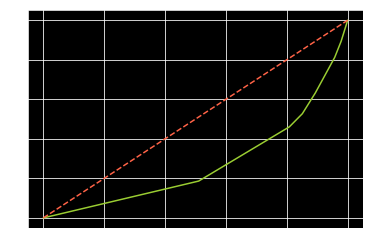

In [16]:
plt.plot(level_ratio_cum, screen_ratio_cum, color='yellowgreen')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle='--', color='tomato')

In [81]:
area = 0.5 - np.sum(((screen_ratio_cum[:-1] + screen_ratio_cum[1:]) * (level_ratio_cum[1:] - level_ratio_cum[:-1]))/2)
gini = 2*area

In [82]:
gini

0.45183339606971507